<a href="https://colab.research.google.com/github/gabrieleantonini00/Econometrics/blob/main/Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# MC SImulations

T=100, tau=0.3
β0: mean=1.000, var=0.035, bias=0.000
β1: mean=2.001, var=0.050, bias=0.001



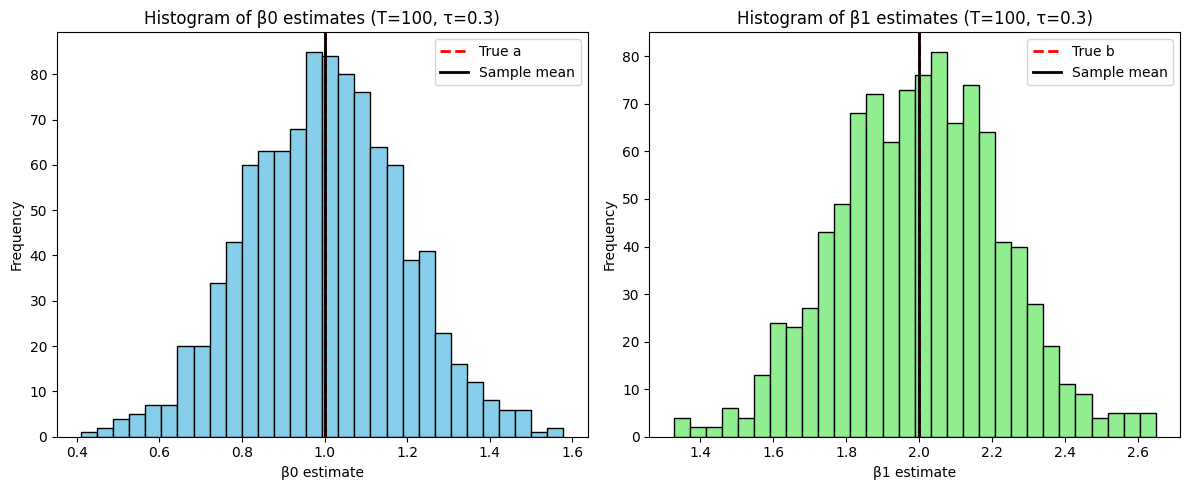

T=100, tau=0.5
β0: mean=1.004, var=0.021, bias=0.004
β1: mean=1.993, var=0.040, bias=-0.007



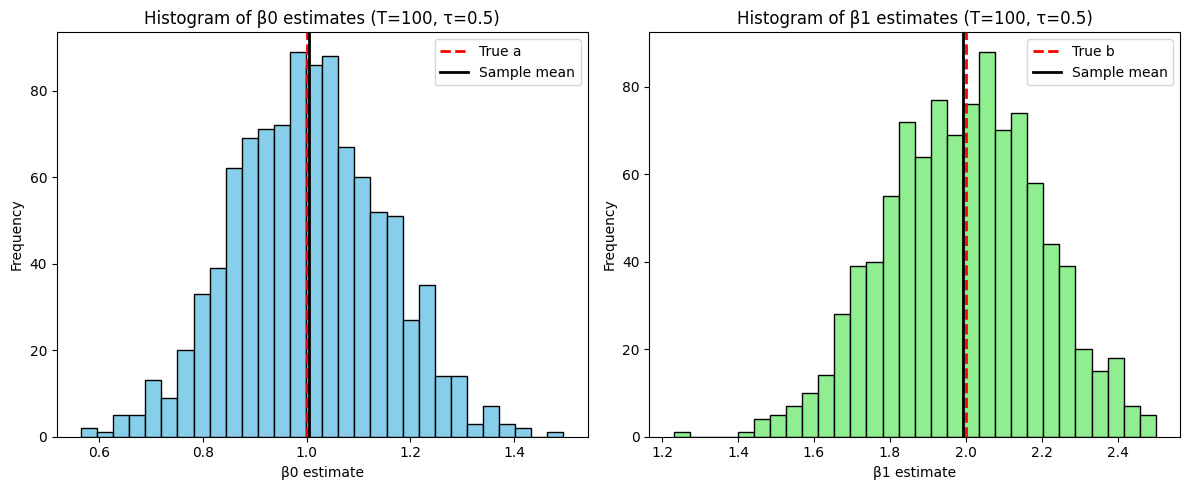

T=100, tau=0.7
β0: mean=0.997, var=0.015, bias=-0.003
β1: mean=2.004, var=0.050, bias=0.004



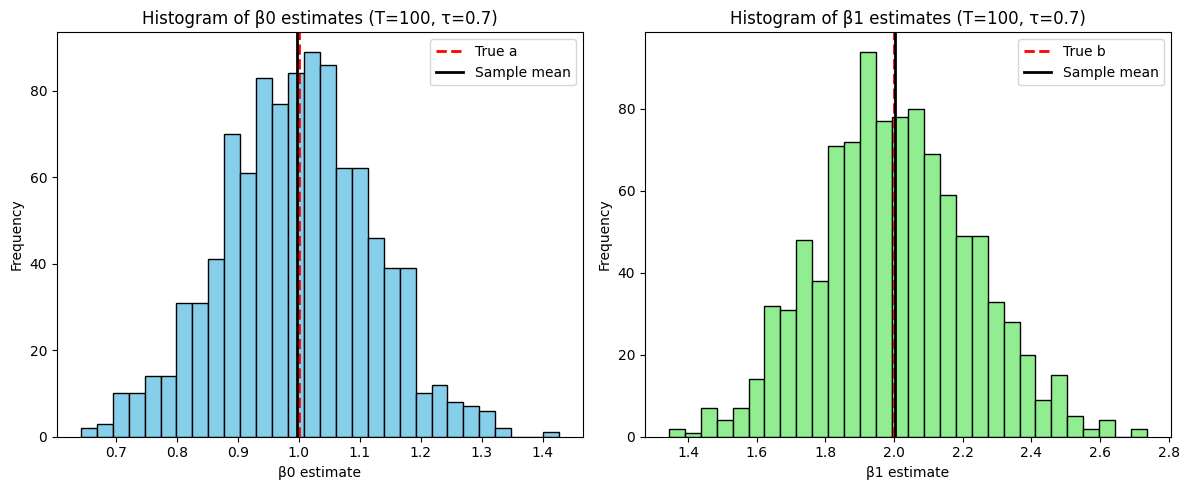

T=200, tau=0.3
β0: mean=1.003, var=0.017, bias=0.003
β1: mean=1.992, var=0.024, bias=-0.008



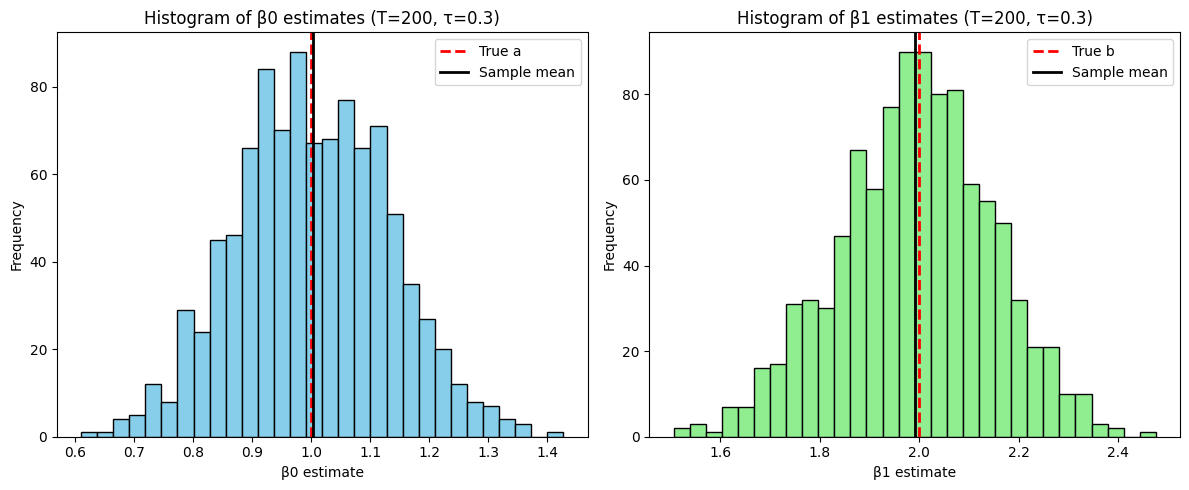

T=200, tau=0.5
β0: mean=1.001, var=0.010, bias=0.001
β1: mean=1.999, var=0.020, bias=-0.001



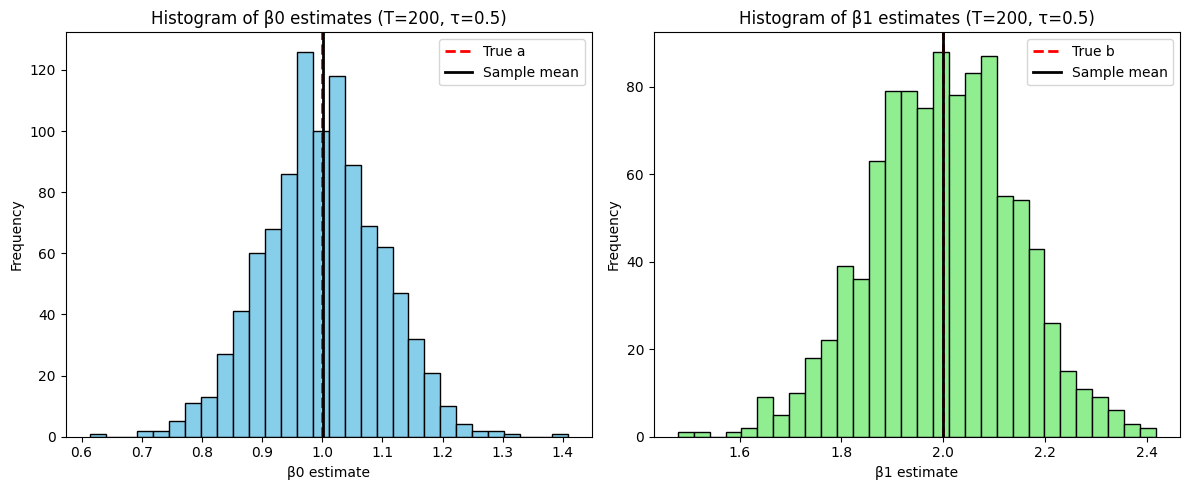

T=200, tau=0.7
β0: mean=0.999, var=0.007, bias=-0.001
β1: mean=2.002, var=0.025, bias=0.002



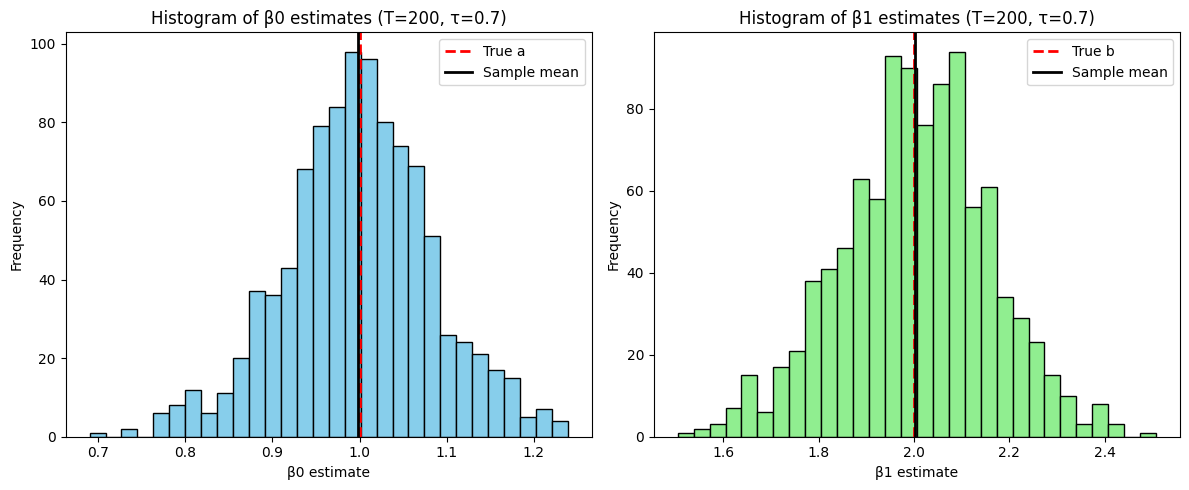

T=400, tau=0.3
β0: mean=0.997, var=0.008, bias=-0.003
β1: mean=1.998, var=0.011, bias=-0.002



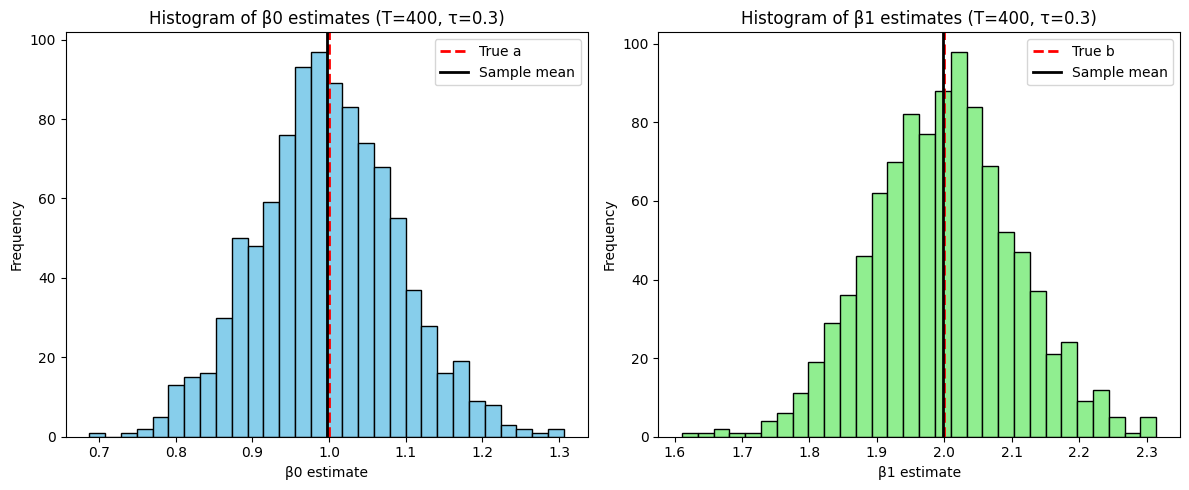

T=400, tau=0.5
β0: mean=1.001, var=0.005, bias=0.001
β1: mean=1.999, var=0.010, bias=-0.001



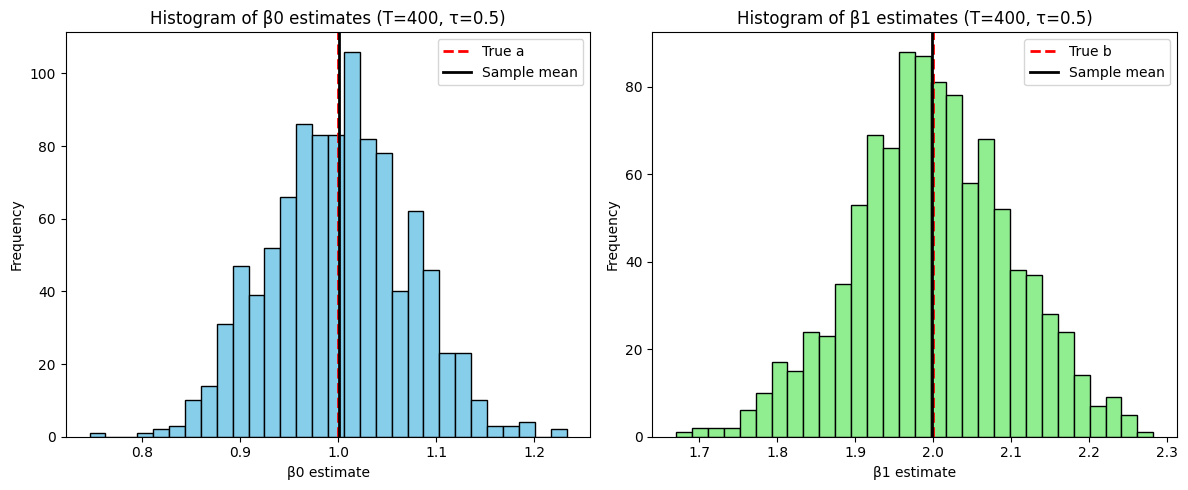

T=400, tau=0.7
β0: mean=1.001, var=0.003, bias=0.001
β1: mean=1.999, var=0.011, bias=-0.001



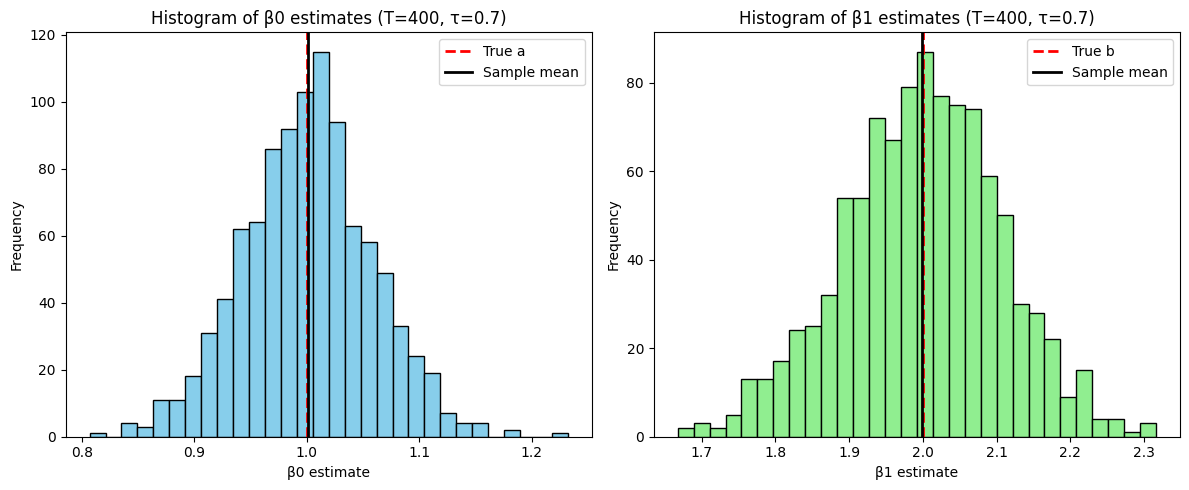

T=500, tau=0.3
β0: mean=1.004, var=0.007, bias=0.004
β1: mean=1.996, var=0.010, bias=-0.004



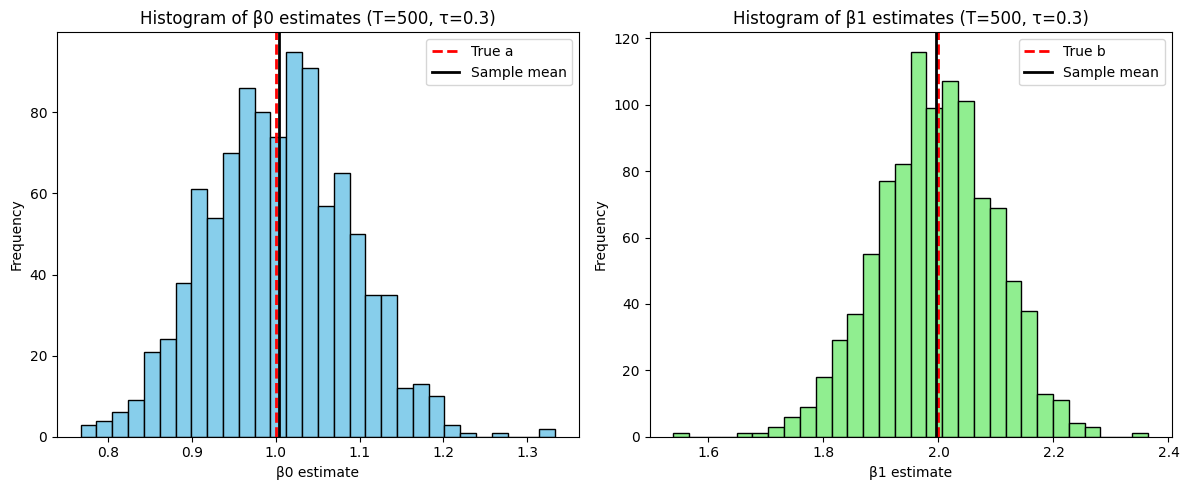

T=500, tau=0.5
β0: mean=1.000, var=0.004, bias=-0.000
β1: mean=1.999, var=0.008, bias=-0.001



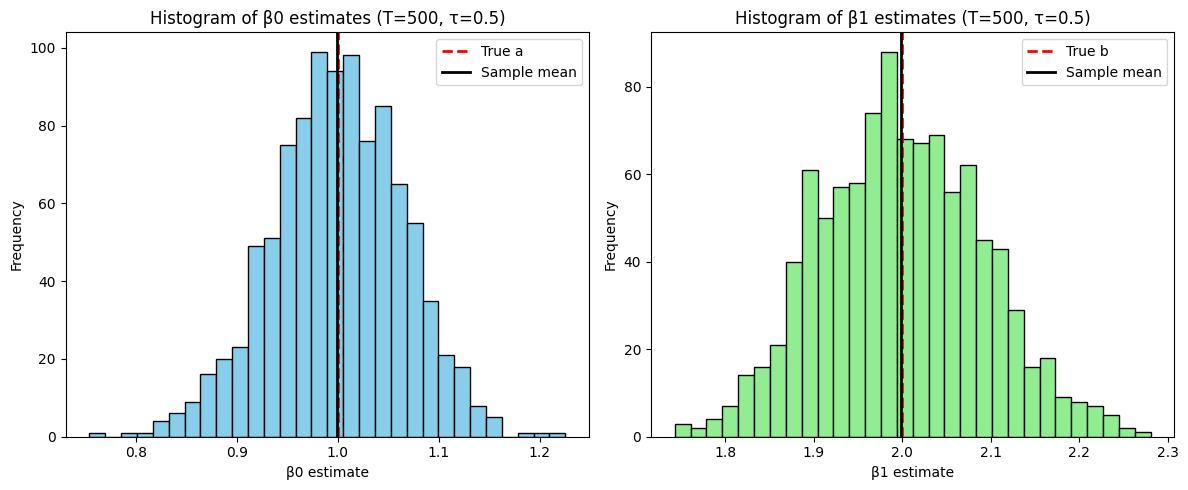

T=500, tau=0.7
β0: mean=1.001, var=0.003, bias=0.001
β1: mean=1.998, var=0.009, bias=-0.002



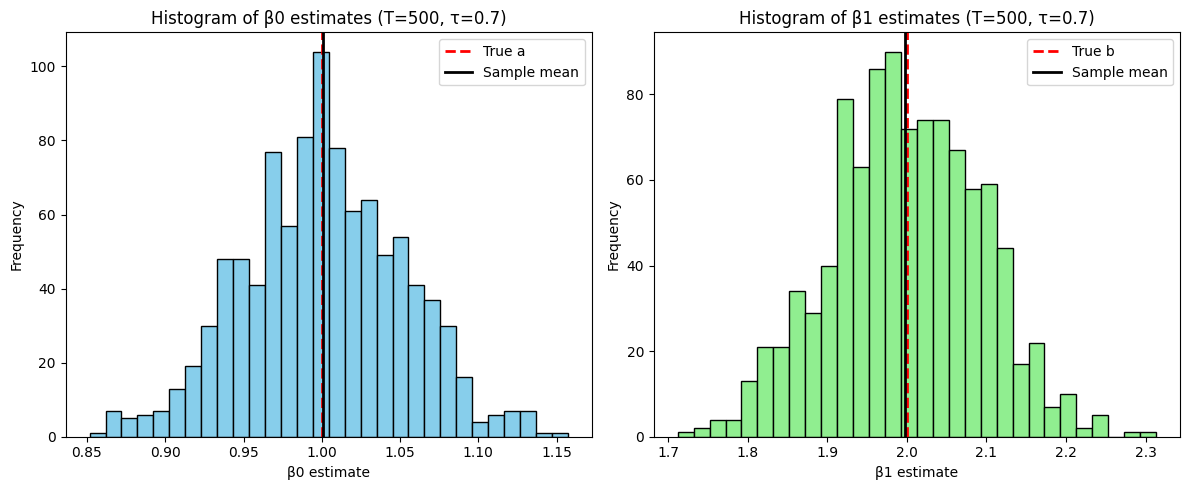

In [5]:
# Monte Carlo parameters
MC = 1000
T_values = [100, 200, 400, 500]
tau_values = [0.3, 0.5, 0.7]
a, b = 1, 2  # true parameters

# Set random seed for reproducibility
np.random.seed(42)

# Loop over T and tau
for T in T_values:
    for tau in tau_values:
        beta0_estimates = []
        beta1_estimates = []
        tau_index = int(np.floor(tau * T))

        for mc in range(MC):
            # Generate Gaussian r_t
            r = np.zeros(T)
            # Pre-shift regime
            r[:tau_index] = np.random.normal(loc=a, scale=1.0, size=tau_index)
            # Post-shift regime
            r[tau_index:] = np.random.normal(loc=a+b, scale=1.0, size=T - tau_index)

            # Create dummy
            d = np.zeros(T)
            d[tau_index:] = 1

            # Regression
            X = sm.add_constant(d)  # adds intercept
            model = sm.OLS(r, X).fit()

            beta0_estimates.append(model.params[0])
            beta1_estimates.append(model.params[1])

        # Convert to numpy arrays
        beta0_estimates = np.array(beta0_estimates)
        beta1_estimates = np.array(beta1_estimates)

        # Compute statistics
        mean_beta0 = np.mean(beta0_estimates)
        mean_beta1 = np.mean(beta1_estimates)
        var_beta0 = np.var(beta0_estimates)
        var_beta1 = np.var(beta1_estimates)
        bias_beta0 = mean_beta0 - a
        bias_beta1 = mean_beta1 - b

        print(f"T={T}, tau={tau}")
        print(f"β0: mean={mean_beta0:.3f}, var={var_beta0:.3f}, bias={bias_beta0:.3f}")
        print(f"β1: mean={mean_beta1:.3f}, var={var_beta1:.3f}, bias={bias_beta1:.3f}\n")

        # Plot histograms with mean
        plt.figure(figsize=(12,5))

        # β0
        plt.subplot(1,2,1)
        plt.hist(beta0_estimates, bins=30, color='skyblue', edgecolor='k')
        plt.axvline(a, color='red', linestyle='dashed', linewidth=2, label='True a')
        plt.axvline(mean_beta0, color='black', linestyle='solid', linewidth=2, label='Sample mean')
        plt.title(f'Histogram of β0 estimates (T={T}, τ={tau})')
        plt.xlabel('β0 estimate')
        plt.ylabel('Frequency')
        plt.legend()

        # β1
        plt.subplot(1,2,2)
        plt.hist(beta1_estimates, bins=30, color='lightgreen', edgecolor='k')
        plt.axvline(b, color='red', linestyle='dashed', linewidth=2, label='True b')
        plt.axvline(mean_beta1, color='black', linestyle='solid', linewidth=2, label='Sample mean')
        plt.title(f'Histogram of β1 estimates (T={T}, τ={tau})')
        plt.xlabel('β1 estimate')
        plt.ylabel('Frequency')
        plt.legend()

        plt.tight_layout()
        plt.show()